# Machine Learning and Statistics Project 2020

## Introduction

In [18]:
# import seaborn 
import seaborn as sns
# Seaborn is a library for making statistical graphics in Python
#It is built on top of matplotlib and closely integrated with pandas data structures.

%matplotlib inline 
# https://stackoverflow.com/a/43028105 to fix the graph 
# import matplotlib
import matplotlib.pyplot as plt
#Matplotlib is a Python 2D plotting library 
#which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

# import pandas
import pandas as pd

# sklearn packages we need for regression import later in regression part to keep that altogather
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression

In [19]:
df = pd.read_csv("./powerproduction.csv")

## Exploratory Data Analysis

In [3]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
df.shape

(500, 2)

In [5]:
df.columns

Index(['speed', 'power'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
print(df.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


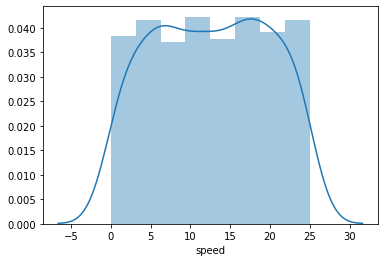

In [8]:
sns.distplot(df['speed'])

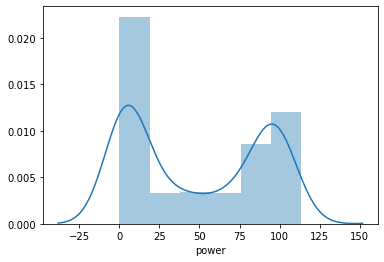

In [9]:
sns.distplot(df['power'])

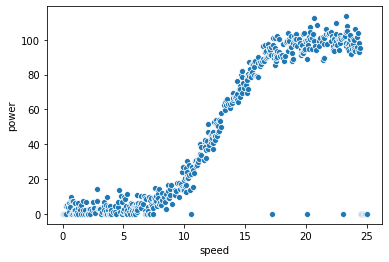

In [10]:
sns.scatterplot(x='speed',y='power',data = df)

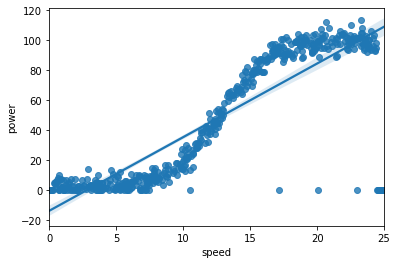

In [11]:
sns.regplot(x='speed',y='power',data = df)
plt.show()

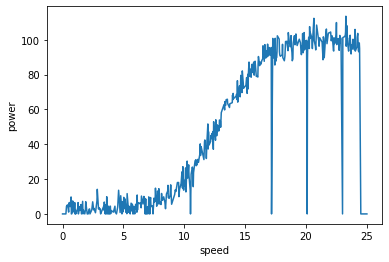

In [9]:
sns.lineplot(x='speed',y='power',data = df)
plt.show()

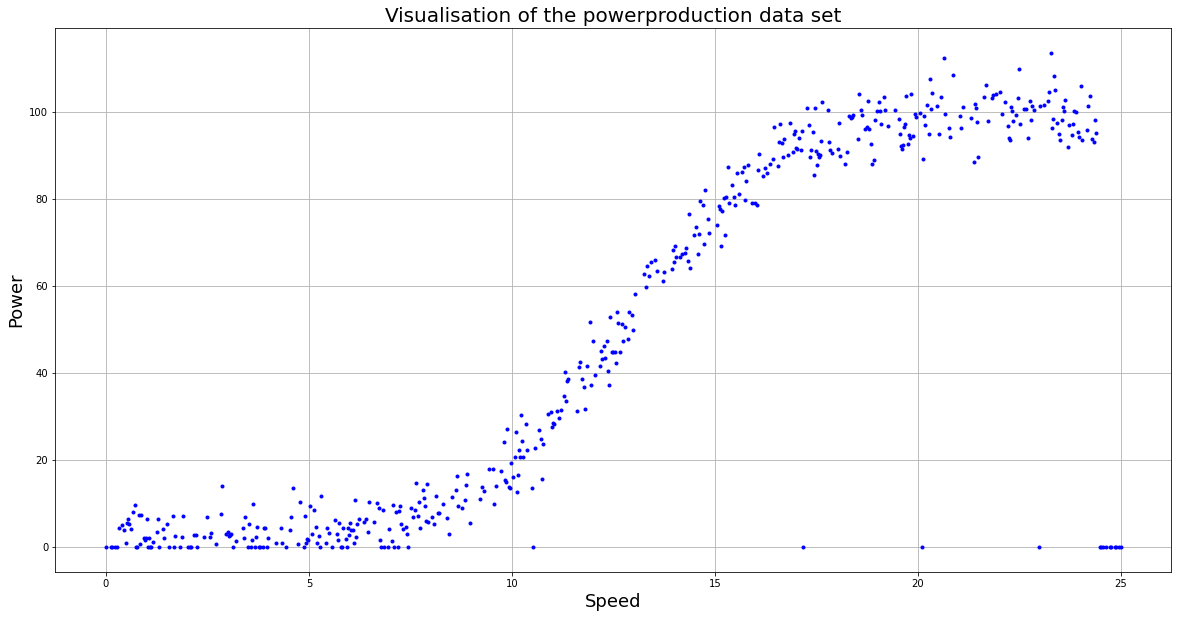

In [14]:
# rc params to customize plot appearance: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2.5

#matplotlib.pyplot used to plot speed and power from the data set
# .b calls for blue dots in the plot
plt.plot(df['speed'], df['power'], '.b')
# add a title to the plot
plt.title('Visualisation of the powerproduction data set', fontsize=20)
# add labels to the x and y axis
plt.xlabel('Speed', fontsize=18)
plt.ylabel('Power', fontsize=18)
# display grid on the plot
plt.grid()
# show the plot
plt.show()

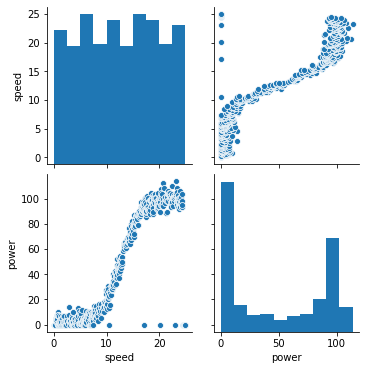

In [15]:
sns.pairplot(df)

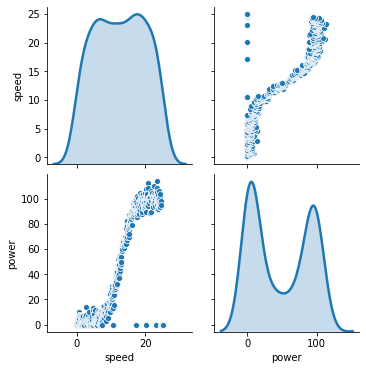

In [16]:

sns.pairplot(df, diag_kind = 'kde')